### Data Description
The dataset is from an online food ordering company's order. The dataset may or may not be real, I am not sure. The website or app operates in new york city and the data contains valuable details about orders they received through their app during a certain period of time. For each food delivery order, dataset recorded the cuisine type, time to prepare the food, time to deliver the food, name of the restaurant, price, etc. 

### Objective

In this project, I use this dataset to learn basic data analysis and add some cool visuals to help understand the findings a little better. 

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

In [1]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data
df = pd.read_csv('foodhub_order.csv')
# Returns the first 5 rows
df.head() 

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [3]:
# Check the shape of the dataset
df.shape 

(1898, 9)

There are 1898 rows and 9 columns in the data set. 

In [4]:
#check variable types and find other information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


All columns have 1898 rows, none of them are empty. Four columns are non-numerical. The rest are integers.

In [5]:
# Checking for missing values in the data

df.isna().sum() 

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

None of the rows have any null values so there is no need to treat any null values.

In [6]:
# Get the summary statistics of the numerical data
df.describe(include="all").T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


In [7]:
MaxPrepTime = df['food_preparation_time'].max()
MinPrepTime = df['food_preparation_time'].min()
AvgPrepTime = df['food_preparation_time'].mean()
print("Maximum time to Prepare Food is",MaxPrepTime,"minutes")
print("Minimum time to Prepare Food is",MinPrepTime,"minutes")
print("Average time to Prepare Food is",AvgPrepTime,"minutes")

Maximum time to Prepare Food is 35 minutes
Minimum time to Prepare Food is 20 minutes
Average time to Prepare Food is 27.371970495258168 minutes


In [8]:
#Find if any orders did not get rated by the customer
df['rating'].value_counts() 

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

736 orders out of 1898 are not rated. 

### Exploratory Data Analysis (EDA)

### Univariate Analysis

#### Order ID

In [9]:
# check unique order ID
df['order_id'].nunique()  

1898

#### Customer ID

In [10]:
# check unique customer ID
df['customer_id'].nunique() 

1200

#### Restaurant name

In [11]:
# check unique Restaurant Name
df['restaurant_name'].nunique()  

178

#### Cuisine type

In [12]:
# Check unique cuisine type
df['cuisine_type'].nunique()  

14

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'American'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Italian'),
  Text(3, 0, 'Chinese'),
  Text(4, 0, 'Mexican'),
  Text(5, 0, 'Indian'),
  Text(6, 0, 'Middle Eastern'),
  Text(7, 0, 'Mediterranean'),
  Text(8, 0, 'Thai'),
  Text(9, 0, 'French'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'Korean'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

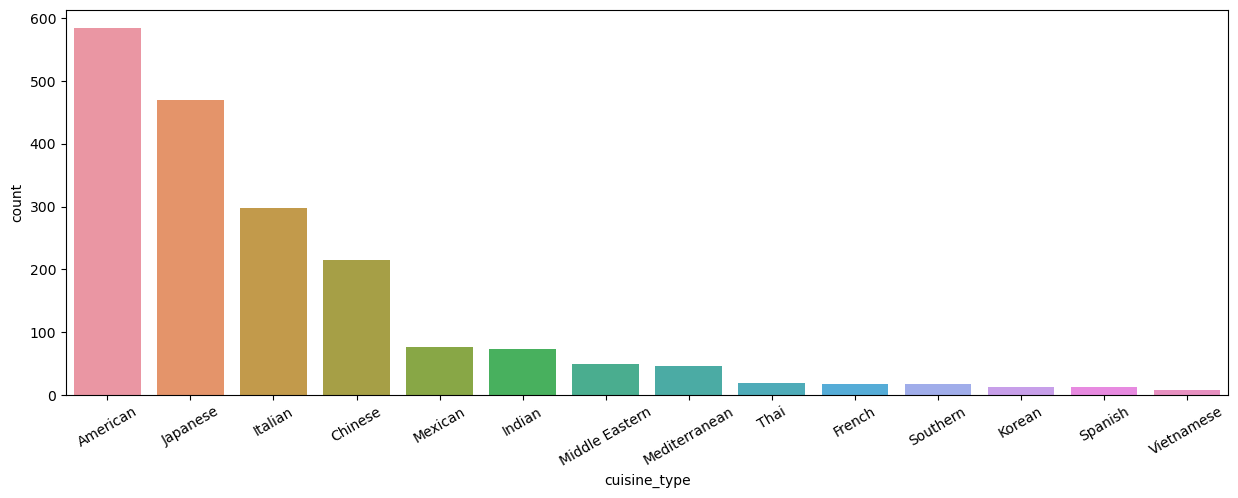

In [13]:
plt.figure(figsize = (15,5))
order = df['cuisine_type'].value_counts().index
sns.countplot(data = df, x = 'cuisine_type',order=order) # countplot for cuisine type
plt.xticks(rotation = 30)

#### Cost of the order

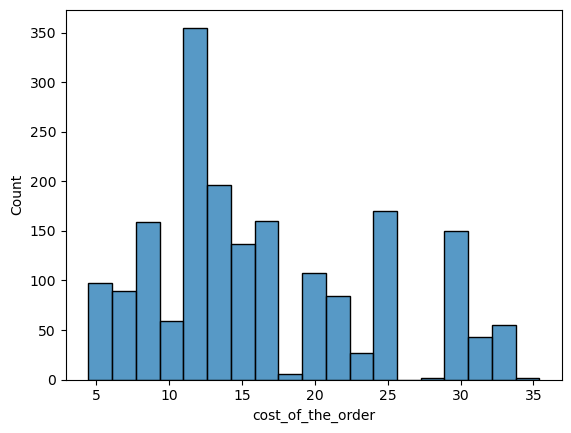

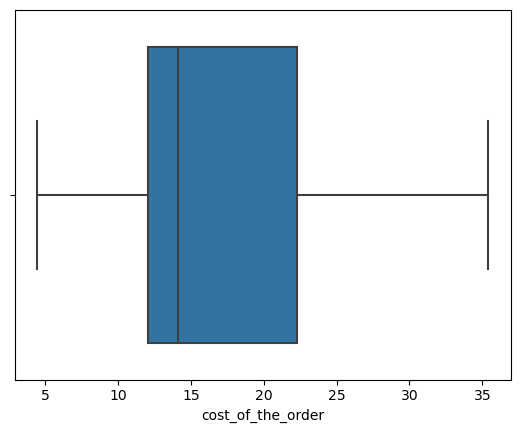

In [14]:
sns.histplot(data=df,x='cost_of_the_order') ## Histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.show() 

#### Day of the week

In [15]:
# # Check for unique values in day of the week column
df['day_of_the_week'].unique

<bound method Series.unique of 0       Weekend
1       Weekend
2       Weekday
3       Weekend
4       Weekday
         ...   
1893    Weekend
1894    Weekend
1895    Weekday
1896    Weekday
1897    Weekend
Name: day_of_the_week, Length: 1898, dtype: object>

In [16]:
df['day_of_the_week'].nunique()

2

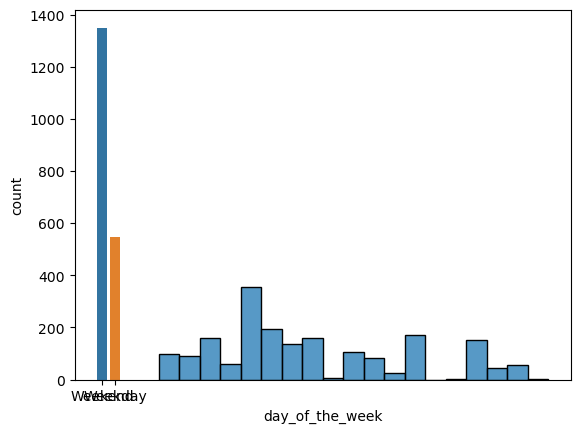

In [17]:
sns.countplot(data = df, x = 'day_of_the_week') 
sns.histplot(data=df,x='cost_of_the_order')
plt.show()

#### Rating

In [18]:
# Check the unique values
df['rating'].nunique() 

4

<Axes: xlabel='rating', ylabel='count'>

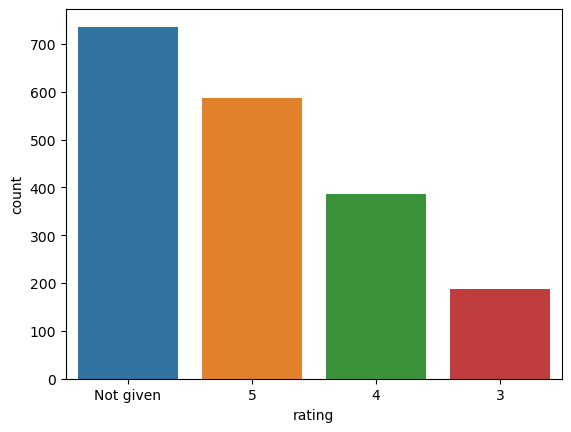

In [19]:
rating_order = df['rating'].value_counts().index
sns.countplot(data = df, x = 'rating',order = rating_order)

#### Food Preparation time

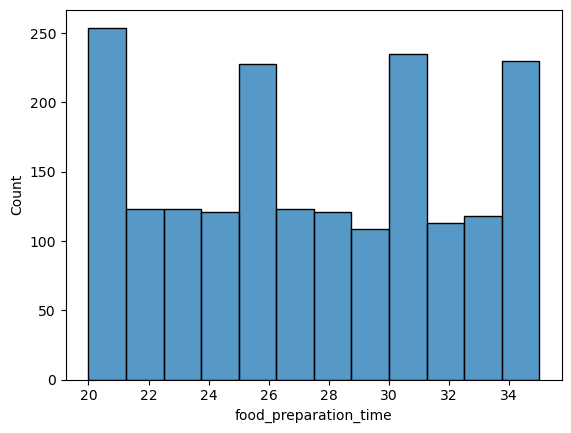

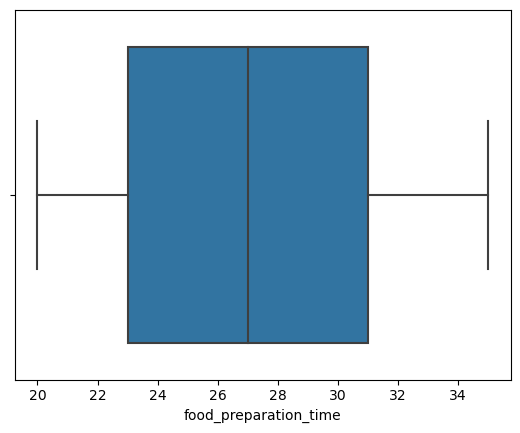

In [20]:
sns.histplot(data=df,x='food_preparation_time') 
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

#### Delivery time

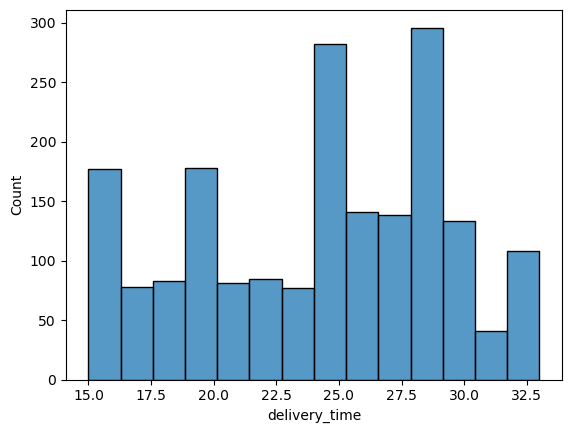

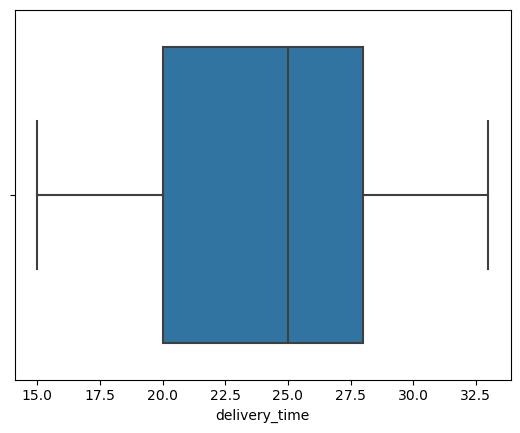

In [21]:
sns.histplot(data=df,x='delivery_time') 
plt.show()
sns.boxplot(data=df,x='delivery_time') 
plt.show()

In [22]:
# Top 5 restaurants with highest number of orders
df['restaurant_name'].value_counts().head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

In [23]:
# Most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts().head(1)  

American    415
Name: cuisine_type, dtype: int64

In [24]:
# Expensive orders: Orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20] 

# The number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


In [25]:
# Mean delivery time for orders
mean_del_time = df['delivery_time'].mean() 

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


In [26]:
# Counts of each customer_id to see which ones ordered the most number of times
df['customer_id'].value_counts().head(3)  

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

### Multivariate Analysis

#### Cuisine vs Cost of the order

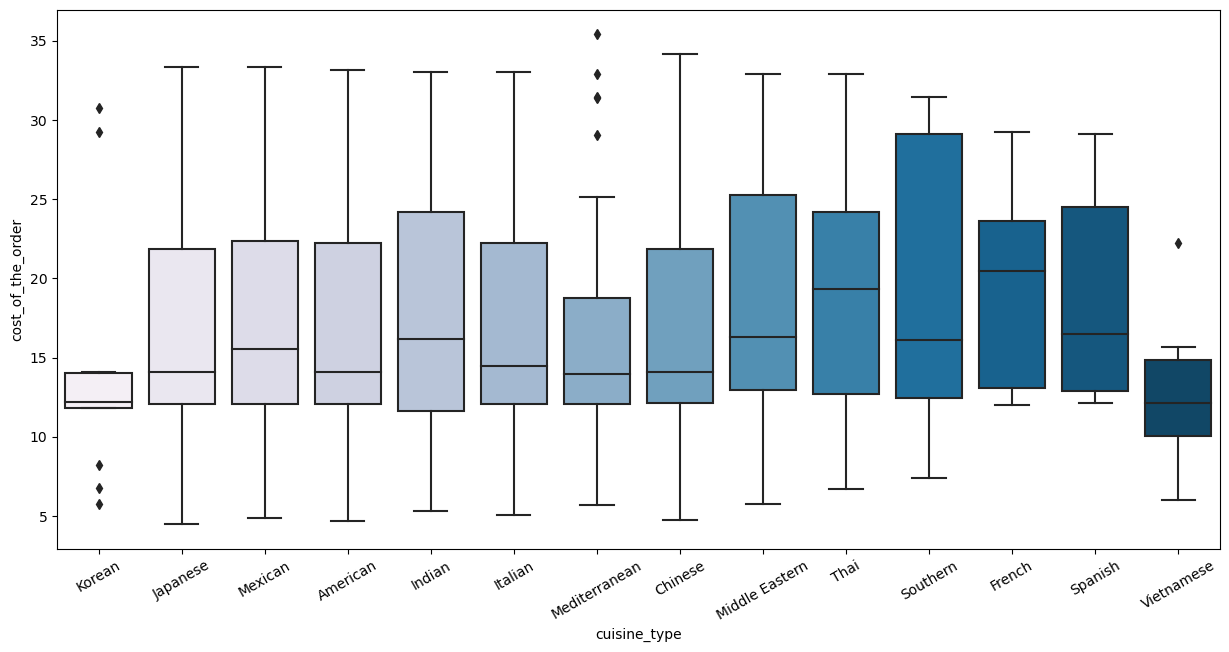

In [27]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 30)
plt.show()

#### Cuisine vs Food Preparation time

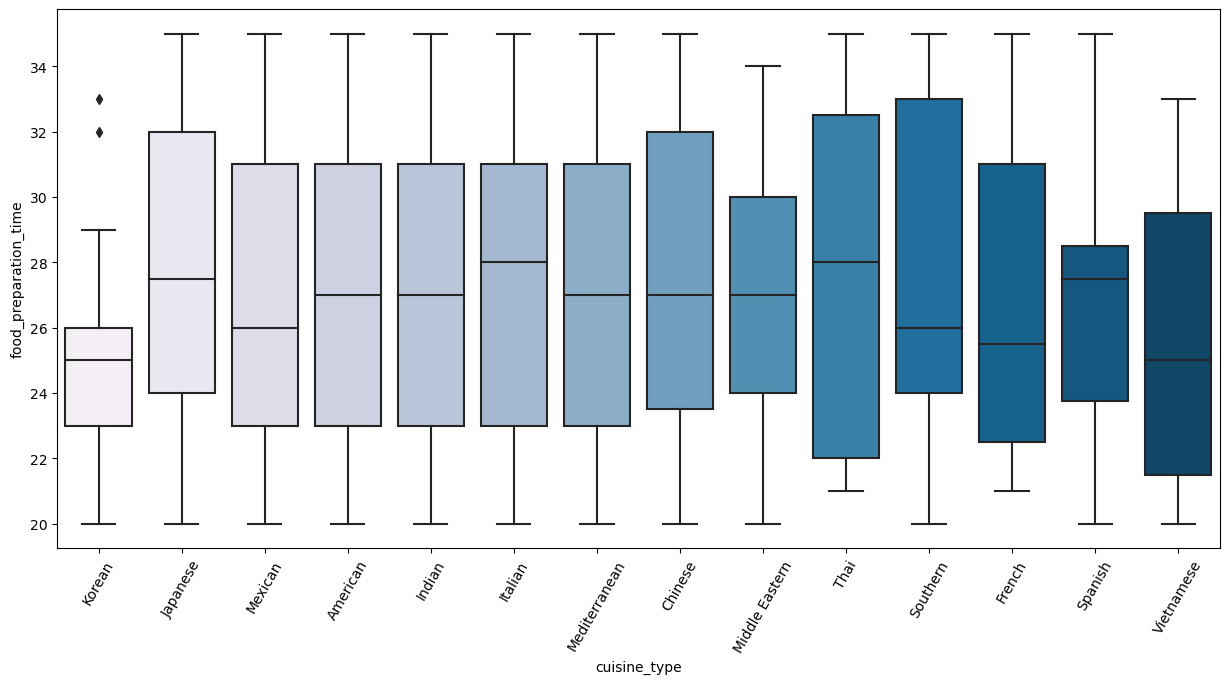

In [28]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'PuBu')  
plt.xticks(rotation = 60)
plt.show()

#### Day of the Week vs Delivery time

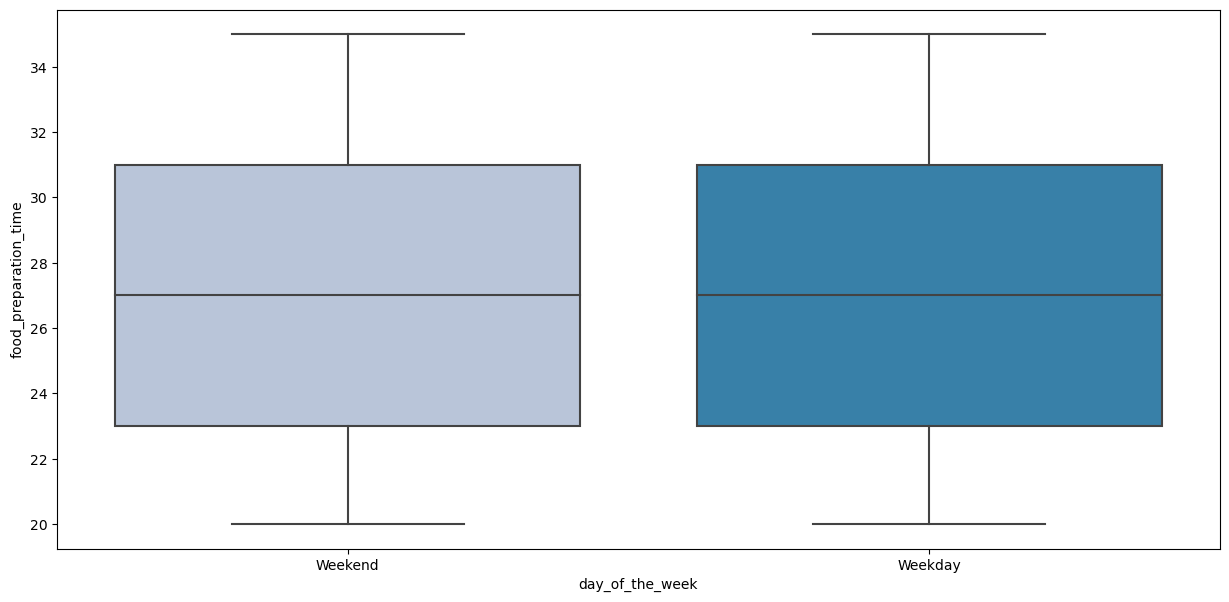

In [29]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x = "day_of_the_week", y = "food_preparation_time",data = df, palette = 'PuBu')  
plt.show()

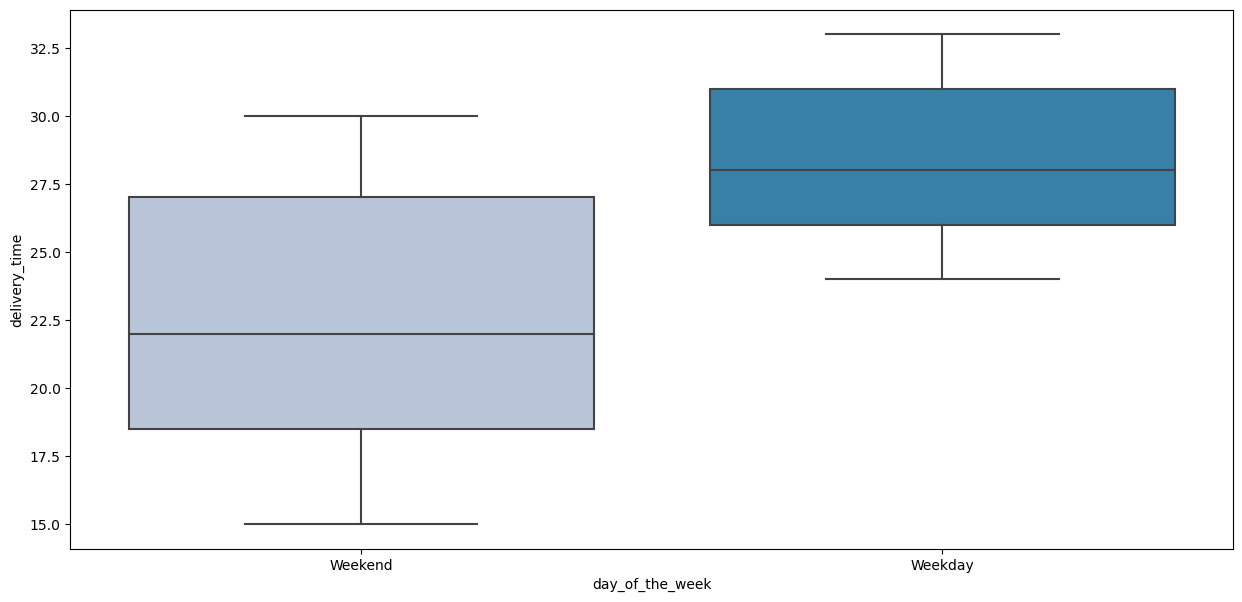

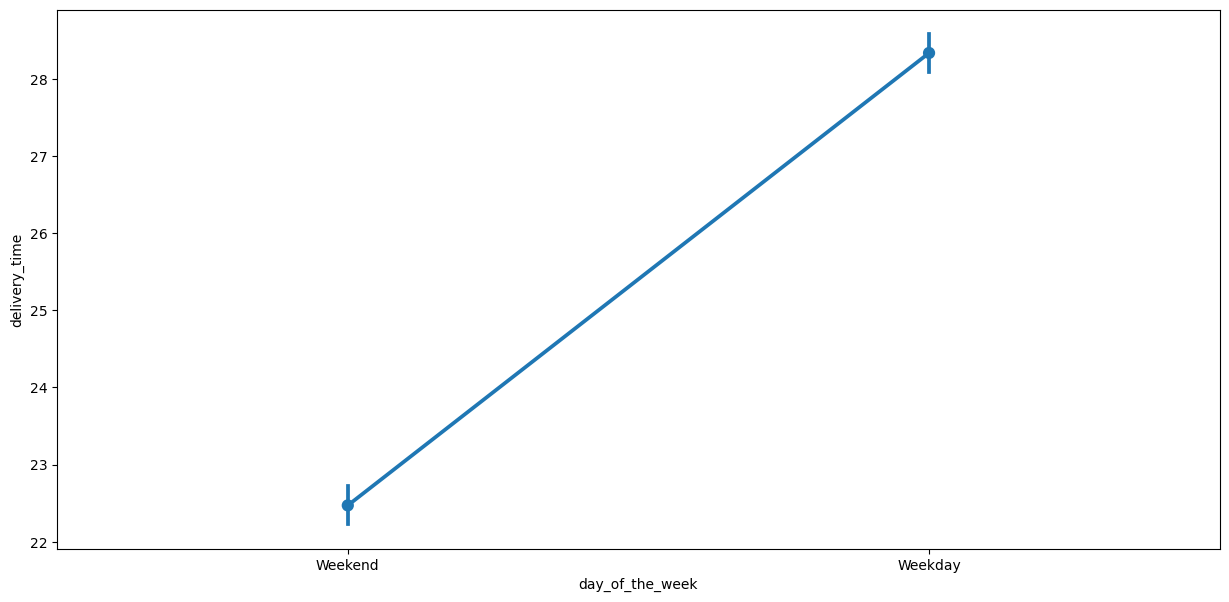

In [30]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x = "day_of_the_week", y = "delivery_time",data = df, palette = 'PuBu')  
plt.show()
plt.figure(figsize=(15,7))
sns.pointplot(x = "day_of_the_week", y = "delivery_time",data = df)  
plt.show()

In [31]:
# Total Order cost for each restaurant
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

#### Rating vs Delivery time

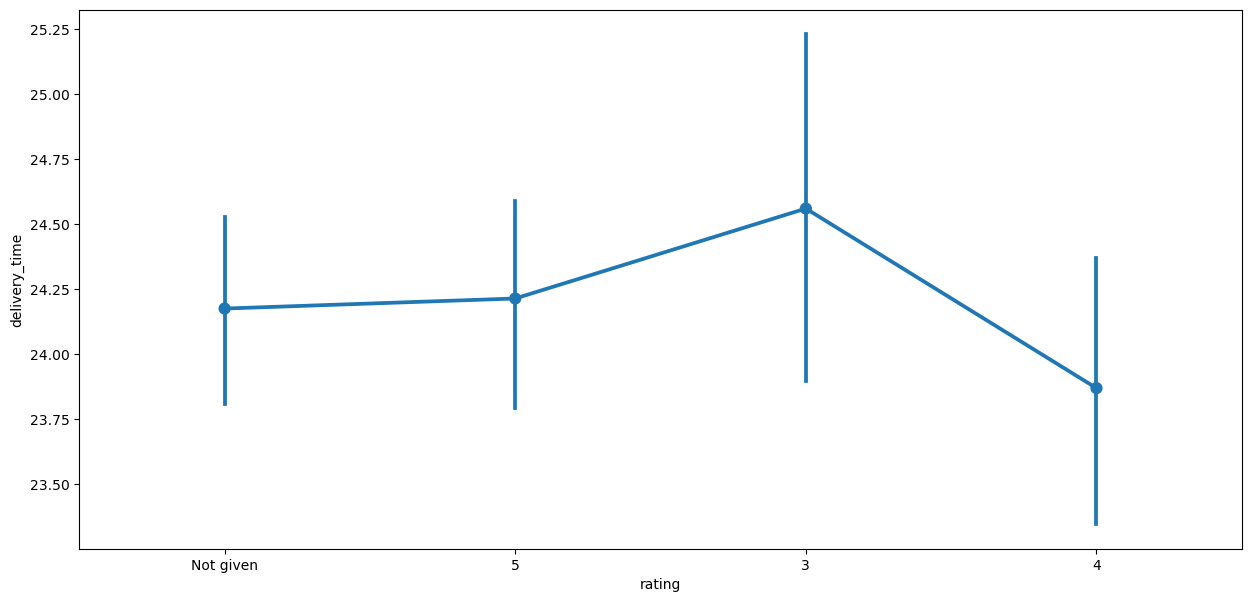

In [32]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

#### Rating vs Food preparation time

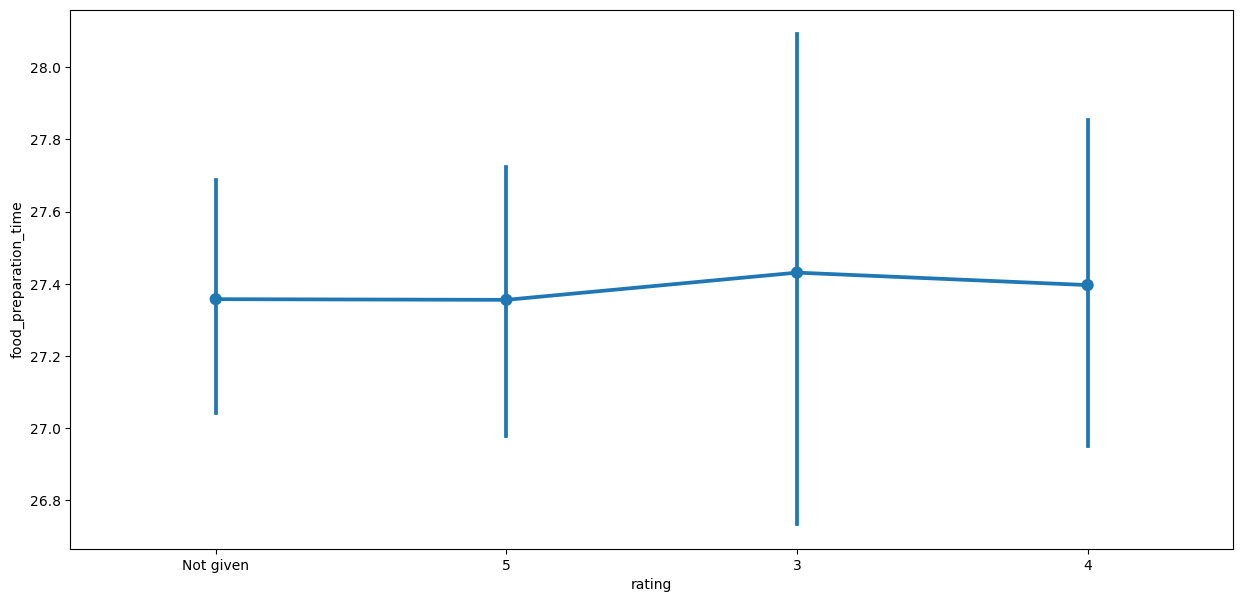

In [34]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)   
plt.show()

#### Rating vs Cost of the order

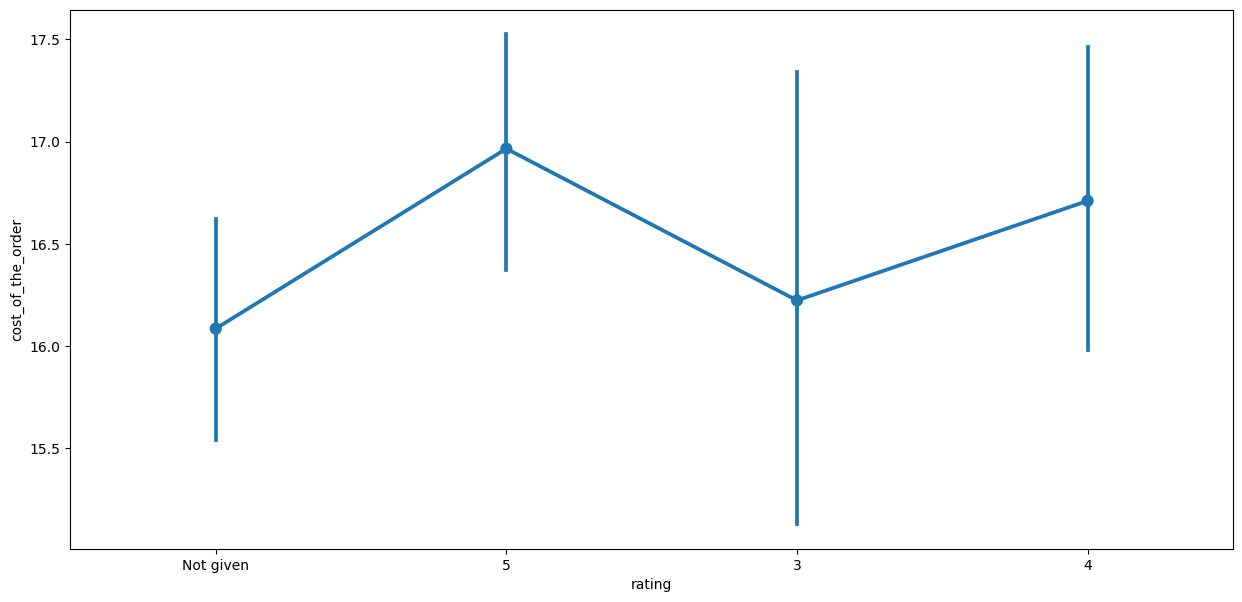

In [35]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)  
plt.show()

#### Correlation among variables

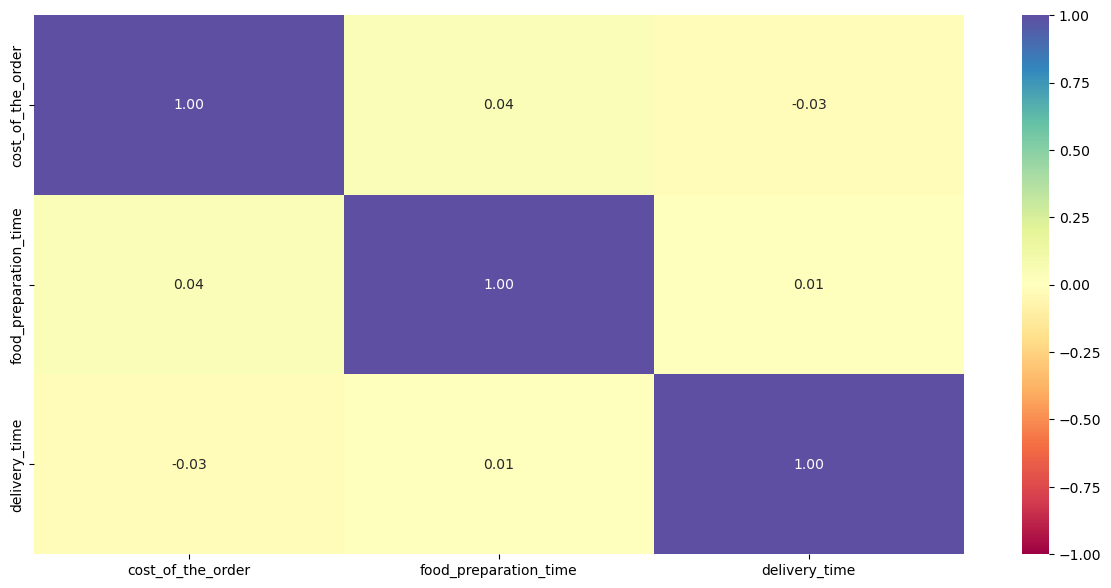

In [36]:
# Plot the heatmap 
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [37]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')  

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head() 

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [38]:
# Function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) 
df.head()


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [39]:
# Total revenue for the Company
total_rev = df['Revenue'].sum()
print('The net revenue is around $', round(total_rev, 2))

The net revenue is around $ 6166.3


In [43]:
# Store the total delivery time as a new column in the dataset
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df['total_time'].sum()

# Percentage of orders that have more than 60 minutes of total delivery time 

df['long_delivery_time'] = (df['delivery_time'] >= 60).value_counts()

percentage_longer_than_60min = (df['long_delivery_time'].sum() / df['delivery_time'].sum()) * 100

print(percentage_longer_than_60min)


0.0


In [44]:
# Mean delivery time on weekdays
print('The average delivery time on weekdays is around', 
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes.')

# Mean delivery time on weekends and print it

print('The average delivery time on weekends is around', 
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes.')




The average delivery time on weekdays is around 28 minutes.
The average delivery time on weekends is around 22 minutes.


### Conclusion and Recommendations

American, Italian and Japanese cuisines are the most lucrative for the delivery company because of two reasons:
• High profit margins because the average cost per order is above 20
• Most orders placed


Customers hould be incentivized to order these three cuisines
• Korean cuisine offers a lot of uncertainty and also has few number of orders, so should be removed from the FoodHub portal
• Due to longer delivery time on weekdays, restaurants should try to reduce food preparation time to make up for the delivery time